### Acquire the Data

In [42]:
housing_data = data.frame(read.table(file='../data/housing.data', header=FALSE, sep=""))
colnames(housing_data) = c('crime','zoned','industrial','river','nox','rooms','age',
                            'work_distance','radial_highway','tax_rate',
                            'student_teacher','african-american','lower_status','median_value')
head(housing_data)
dim(housing_data)
housing_data$river = factor(housing_data$river)
housing_data$median_value <- NULL

crime   zoned industrial river nox   rooms age  work_distance radial_highway
1 0.00632 18    2.31       0     0.538 6.575 65.2 4.0900        1             
2 0.02731  0    7.07       0     0.469 6.421 78.9 4.9671        2             
3 0.02729  0    7.07       0     0.469 7.185 61.1 4.9671        2             
4 0.03237  0    2.18       0     0.458 6.998 45.8 6.0622        3             
5 0.06905  0    2.18       0     0.458 7.147 54.2 6.0622        3             
6 0.02985  0    2.18       0     0.458 6.430 58.7 6.0622        3             
  tax_rate student_teacher african-american lower_status median_value
1 296      15.3            396.90           4.98         24.0        
2 242      17.8            396.90           9.14         21.6        
3 242      17.8            392.83           4.03         34.7        
4 222      18.7            394.63           2.94         33.4        
5 222      18.7            396.90           5.33         36.2        
6 222      18.7            394.12           5.21         28.7

[1] 506  14

In [43]:
summary(housing_data)

     crime              zoned          industrial    river        nox        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   0:471   Min.   :0.3850  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1: 35   1st Qu.:0.4490  
 Median : 0.25651   Median :  0.00   Median : 9.69           Median :0.5380  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14           Mean   :0.5547  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10           3rd Qu.:0.6240  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74           Max.   :0.8710  
     rooms            age         work_distance    radial_highway  
 Min.   :3.561   Min.   :  2.90   Min.   : 1.130   Min.   : 1.000  
 1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100   1st Qu.: 4.000  
 Median :6.208   Median : 77.50   Median : 3.207   Median : 5.000  
 Mean   :6.285   Mean   : 68.57   Mean   : 3.795   Mean   : 9.549  
 3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188   3rd Qu.:24.000  
 Max.   :8.780   Max.   :100.00   Max.   :12.1

In [44]:
# install.packages("moments")
library(moments)

In [45]:
housing_features = Filter(is.numeric, housing_data)
stats = data.frame(feature=colnames(housing_features))
stats['mean_'] = sapply(housing_features, mean)
stats['sd_'] = sapply(housing_features, sd)
stats['skewness_'] = sapply(housing_features, skewness)
stats

feature          mean_       sd_         skewness_ 
1  crime              3.6135236   8.6015451  5.2076524
2  zoned             11.3636364  23.3224530  2.2190631
3  industrial        11.1367787   6.8603529  0.2941463
4  nox                0.5546951   0.1158777  0.7271442
5  rooms              6.2846344   0.7026171  0.4024147
6  age               68.5749012  28.1488614 -0.5971856
7  work_distance      3.7950427   2.1057101  1.0087788
8  radial_highway     9.5494071   8.7072594  1.0018335
9  tax_rate         408.2371542 168.5371161  0.6679683
10 student_teacher   18.4555336   2.1649455 -0.7999445
11 african-american 356.6740316  91.2948644 -2.8817983
12 lower_status      12.6530632   7.1410615  0.9037707

### Develop a Sampling Technique

1. Demonstrate a sample size and/or method that is sufficient to describe the dataset
2. Pull samples of different sizes
3. Compare these samples to the original data.

In [46]:
library(dplyr, warn.conflicts = FALSE)
library(ggplot2)
library(repr)
# install.packages("cowplot")
library(cowplot)

Sampling replicated 10 times with average stdev  -0.02003788 
Sampling replicated 50 times with average stdev  -0.02817344 
Sampling replicated 100 times with average stdev  0.007497068 
Sampling replicated 150 times with average stdev  0.001347965 
Sampling replicated 200 times with average stdev  0.00385527 
Let's use the iteration count with the stdev closest to Zero: 150 
Sampling size 10  with average stdev  0.006846089 
Sampling size 35  with average stdev  -0.003836925 
Sampling size 60  with average stdev  0.003875626 
Sampling size 85  with average stdev  0.002550569 
Sampling size 110  with average stdev  -0.003322471 
Sampling size 135  with average stdev  -0.0001184723 
Sampling size 160  with average stdev  0.001648302 
Sampling size 185  with average stdev  -0.001746763 
Sampling size 210  with average stdev  0.00269758 
Sampling size 235  with average stdev  -8.663515e-05 
Sampling size 260  with average stdev  0.001636197 
Sampling size 285  with average stdev  -0.00085

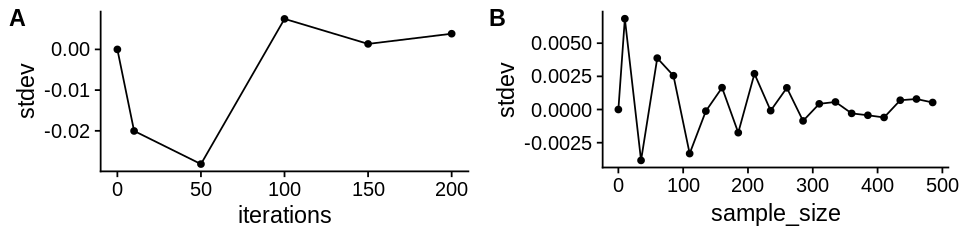

In [50]:
compute_scaled_stdev <- function(df, df_stats, sample_size) {
    (colMeans(sample_n(df, sample_size)) - df_stats$mean_ ) / df_stats$sd_
}

compute_sample_size_accuracy <- function(df, df_stats, sample_size, loops) {
    rowMeans(replicate(loops, compute_scaled_stdev(df, df_stats, sample_size)))
}

iteration_count = c(10, 50, 100, 150, 200)
iteration_stdev = c()
for(i in iteration_count) {
    results = compute_sample_size_accuracy(housing_features, stats, 20, i)
    iteration_stdev <- c(iteration_stdev, mean(results))
    cat("Sampling replicated", i, "times with average stdev ", tail(iteration_stdev, n=1), "\n", sep=" ")
}
df = data.frame(iterations=c(0,iteration_count), stdev=c(0,iteration_stdev))
options(repr.plot.width=8, repr.plot.height=2)
plots1 = ggplot(data=df, aes(x=iterations, y=stdev, group=1)) + geom_line()+ geom_point()


best_loop_count = iteration_count[which.min(abs(iteration_stdev))]
cat("Let's use the iteration count with the stdev closest to Zero:", best_loop_count, "\n", sep=" ")


sample_sizes = seq(10, 500, 25)
sample_size_stdev = c()
for(i in sample_sizes) {
    results = compute_sample_size_accuracy(housing_features, stats, i, best_loop_count)
    sample_size_stdev = c(sample_size_stdev, mean(results))
    cat("Sampling size", i, " with average stdev ", tail(sample_size_stdev, n=1), "\n", sep=" ")
}
df = data.frame(sample_size=c(0, sample_sizes), stdev=c(0, sample_size_stdev))
plots2 = ggplot(data=df, aes(x=sample_size, y=stdev, group=1)) + geom_line() + geom_point()
plot_grid(plots1, plots2, labels = "AUTO")

### Discuss how much data do you need to get a description of the dataset

From plot B of the sample size, we can see the stdev starts to approach 0 around a sample set size of 150 but doesn't fully settle until about 300 samples.